In [58]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Cleaning of data

In [59]:
datingApp = pd.read_csv('DatingAppReviewsDataset.csv', index_col=0)
datingApp = datingApp.drop(columns=['#ThumbsUp'], errors='ignore')
datingApp.rename(columns={'Date&Time': 'Year'}, inplace=True)
datingApp

,Name,Review,Rating,Year,App
0,linah sibanda,On this app i cant find a partner,5,18-02-2022 01:19,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,18-02-2022 01:16,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,18-02-2022 01:11,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,18-02-2022 01:11,Tinder
4,Arthur Magamedov,Love it!,5,18-02-2022 01:06,Tinder
...,...,...,...,...,...
52989,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,12-07-2017 01:44,Hinge
52990,Brian Shook,I can't get past the initial set up. It won't...,1,12-07-2017 01:36,Hinge
52991,A Google user,This is incredible! A quality dating app for A...,5,12-07-2017 01:32,Hinge
52992,A Google user,"""Over Water"" ... Can't choose location.",2,12-07-2017 01:28,Hinge


In [60]:
datingApp['Year'] = pd.to_datetime(datingApp['Year'], errors='coerce').dt.year
datingApp

,Name,Review,Rating,Year,App
0,linah sibanda,On this app i cant find a partner,5,2022,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,2022,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,2022,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,2022,Tinder
4,Arthur Magamedov,Love it!,5,2022,Tinder
...,...,...,...,...,...
52989,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,2017,Hinge
52990,Brian Shook,I can't get past the initial set up. It won't...,1,2017,Hinge
52991,A Google user,This is incredible! A quality dating app for A...,5,2017,Hinge
52992,A Google user,"""Over Water"" ... Can't choose location.",2,2017,Hinge


Remove null values and drop duplicates

In [61]:
datingApp = datingApp.dropna().reset_index(drop=True)
datingApp.drop_duplicates(inplace=True)
datingApp = datingApp.reset_index(drop=True)

In [62]:
datingApp.head()

,Name,Review,Rating,Year,App
0,linah sibanda,On this app i cant find a partner,5,2022,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,2022,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,2022,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,2022,Tinder
4,Arthur Magamedov,Love it!,5,2022,Tinder


In [63]:
datingApp.shape

(672619, 5)

In [64]:
datingApp.dtypes

Name      object
Review    object
Rating     int64
Year       int32
App       object
dtype: object

# Analysing data and Reviews

In [65]:
#Distinct values of 'rating' and its count  
print(f"Rating value count: \n{datingApp['Rating'].value_counts()}")

Rating value count: 
Rating
1    251516
5    226031
4     86225
3     56644
2     52202
0         1
Name: count, dtype: int64


In [66]:
print(f"App value count: \n{datingApp['App'].value_counts()}")

App value count: 
App
Tinder    517709
Bumble    102092
Hinge      52818
Name: count, dtype: int64


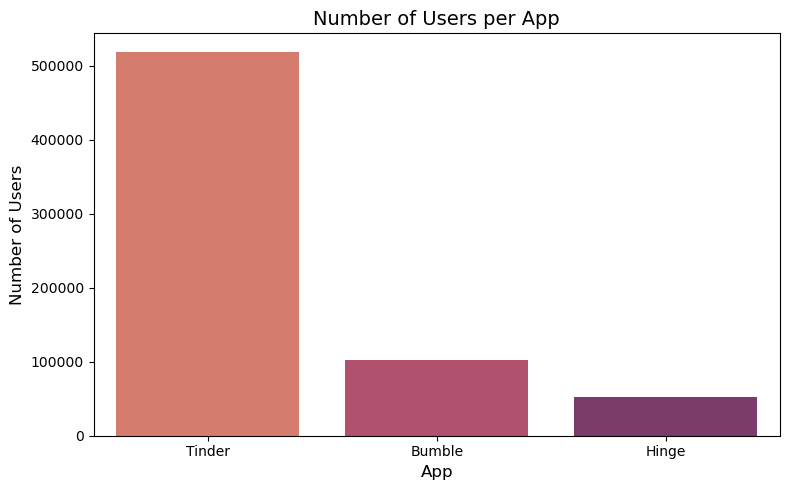

In [67]:
# Count the number of users per app
user_counts = datingApp['App'].value_counts().reset_index()
user_counts.columns = ['App', 'User Count']

# Plot the bar chart using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=user_counts, x='App', y='User Count', palette='flare')

# Add titles and labels
plt.title("Number of Users per App", fontsize=14)
plt.xlabel("App", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

In [68]:
ratings_by_app = datingApp.groupby(['App', 'Rating']).size().unstack(fill_value=0)
print("Ratings by App:")
print(ratings_by_app)

Ratings by App:
Rating  0       1      2      3      4       5
App                                           
Bumble  0   40400   9672   8832  13558   29630
Hinge   0   15918   4508   5283   8605   18504
Tinder  1  195198  38022  42529  64062  177897


In [69]:
#there is a 0 rating for tinder which is not possible, we need to remove it
datingApp = datingApp[datingApp['Rating'] != 0]
datingApp.reset_index(drop=True, inplace=True)
datingApp

,Name,Review,Rating,Year,App
0,linah sibanda,On this app i cant find a partner,5,2022,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,2022,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,2022,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,2022,Tinder
4,Arthur Magamedov,Love it!,5,2022,Tinder
...,...,...,...,...,...
672613,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,2017,Hinge
672614,Brian Shook,I can't get past the initial set up. It won't...,1,2017,Hinge
672615,A Google user,This is incredible! A quality dating app for A...,5,2017,Hinge
672616,A Google user,"""Over Water"" ... Can't choose location.",2,2017,Hinge


In [70]:
ratings_by_app = datingApp.groupby(['App', 'Rating']).size().unstack(fill_value=0)
print(ratings_by_app)

Rating       1      2      3      4       5
App                                        
Bumble   40400   9672   8832  13558   29630
Hinge    15918   4508   5283   8605   18504
Tinder  195198  38022  42529  64062  177897


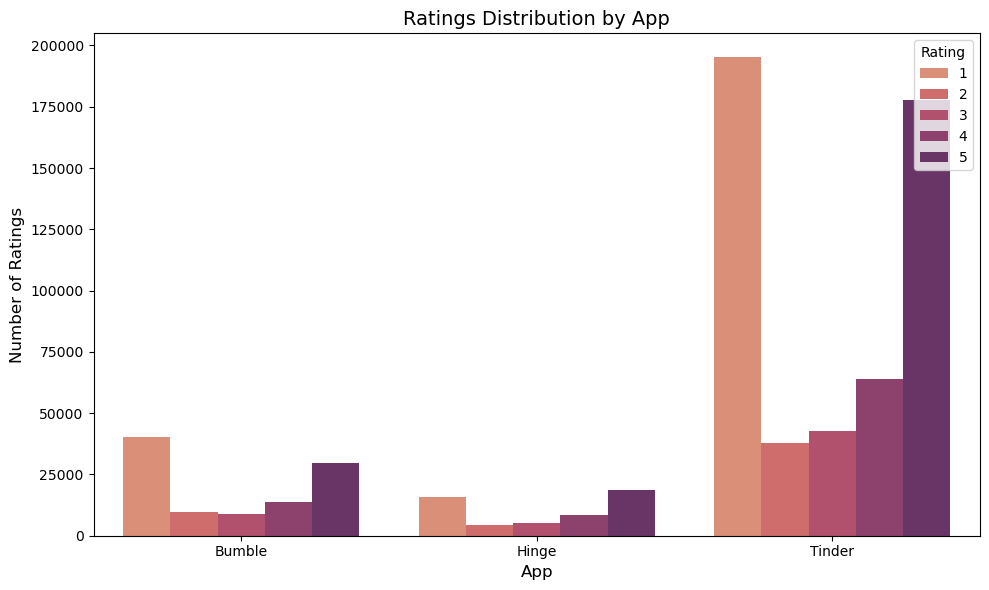

In [71]:
# Ensure `ratings_by_app` is in long format for Seaborn
ratings_by_app_long = ratings_by_app.reset_index().melt(
    id_vars=['App'], var_name='Rating', value_name='Count'
)

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ratings_by_app_long,
    x='App',
    y='Count',
    hue='Rating',
    palette='flare'
)

# Add titles and labels
plt.title("Ratings Distribution by App", fontsize=14)
plt.xlabel("App", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Rating", loc="upper right")

# Display the plot
plt.tight_layout()
plt.show()

As an overview, we can see that tinder has a lot of 1 star reviews which is not a good sign as a dating app. People are not enjoying it. Same with Hinge and Bumble where 1 star reviews are more than the 5 star ones.
This does not necessarily mean they are all bad. Let's delve more into it.

**We can see that an overwhelming majority of ratings are for *Tinder* and *Hinge and Bumble* have very less amount of ratings. If we use this to derive conclusions about these dating apps, there is an introduction of inherent bias considering the staggering number of tinder users. Hence we need to normalize this data**

In [72]:
import re
def clean_text_simple(text):
    # Remove emojis and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

datingApp['cleaned_review'] = datingApp['Review'].apply(clean_text_simple)

In [73]:
print(datingApp[datingApp['cleaned_review']==''])

                      Name Review  Rating  Year     App cleaned_review
13             ayush singh     😜😛       1  2022  Tinder               
566      Upender Shekhawat      👍       5  2022  Tinder               
616     Muyiwa Praiseworth     🔥🔥       5  2022  Tinder               
631             Andy irish      🌻       5  2022  Tinder               
747           Lijo Vitalis      😋       5  2022  Tinder               
...                    ...    ...     ...   ...     ...            ...
669733      David Marowitz      👌       5  2018   Hinge               
669989         David Lewis      👍       5  2018   Hinge               
670174          Kris stedy    👉👌🙈       5  2018   Hinge               
670629           Mike Long    👍👍👍       5  2018   Hinge               
671274          Lalit Soni      👍       5  2018   Hinge               

[4954 rows x 6 columns]


In [74]:
datingApp=datingApp[datingApp['cleaned_review']!='']
datingApp

,Name,Review,Rating,Year,App,cleaned_review
0,linah sibanda,On this app i cant find a partner,5,2022,Tinder,on this app i cant find a partner
1,Norman Johnson,Tinder would be so much better if we could spe...,3,2022,Tinder,tinder would be so much better if we could spe...
2,David Hume,Still doesn't correctly notify matches or mess...,1,2022,Tinder,still doesnt correctly notify matches or messa...
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,2022,Tinder,got banned because i updated my bio to say i f...
4,Arthur Magamedov,Love it!,5,2022,Tinder,love it
...,...,...,...,...,...,...
672613,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,2017,Hinge,useless im in the uk and it tells me im over w...
672614,Brian Shook,I can't get past the initial set up. It won't...,1,2017,Hinge,i cant get past the initial set up it wont set...
672615,A Google user,This is incredible! A quality dating app for A...,5,2017,Hinge,this is incredible a quality dating app for an...
672616,A Google user,"""Over Water"" ... Can't choose location.",2,2017,Hinge,over water cant choose location


In [75]:
print(datingApp[datingApp['cleaned_review']==''])

Empty DataFrame
Columns: [Name, Review, Rating, Year, App, cleaned_review]
Index: []


In [76]:
datingApp.to_csv('datingAppCleaned.csv', index=False)

In [77]:
# Group by App and Rating to get counts
app_rating_counts = datingApp.groupby(['App', 'Rating']).size().reset_index(name='Count')

# Find the minimum count for each Rating group across all Apps
min_count_per_rating = app_rating_counts.groupby('Rating')['Count'].min()

# Perform stratified sampling
def stratified_sample(group):
    # Get the minimum sample size for the current rating
    min_count = min_count_per_rating[group['Rating'].iloc[0]]
    # Sample from the group, ensuring it doesn't exceed the minimum count
    return group.sample(n=min_count, random_state=42)

# Apply stratified sampling
datingAppNor = datingApp.groupby(['App', 'Rating'], group_keys=False).apply(stratified_sample)

# Check the normalized DataFrame
print(datingAppNor['App'].value_counts())  # Ensure apps are balanced
print(datingAppNor.groupby(['App', 'Rating']).size())  # Check group sizes

App
Bumble    52632
Hinge     52632
Tinder    52632
Name: count, dtype: int64
App     Rating
Bumble  1         15906
        2          4507
        3          5276
        4          8584
        5         18359
Hinge   1         15906
        2          4507
        3          5276
        4          8584
        5         18359
Tinder  1         15906
        2          4507
        3          5276
        4          8584
        5         18359
dtype: int64


In [78]:
datingAppNor

,Name,Review,Rating,Year,App,cleaned_review
601814,Brett Wallace,SJW app that stole from tinder. Their way of f...,1,2018,Bumble,sjw app that stole from tinder their way of fi...
570562,binidh gupta,No match untill u buy premium ...,1,2019,Bumble,no match untill u buy premium
531976,Sealdory,It deleted my profile saying I am under 18 eve...,1,2021,Bumble,it deleted my profile saying i am under 18 eve...
614751,Yomi O,"Bugs on bugs. I matched it a girl, we were cha...",1,2016,Bumble,bugs on bugs i matched it a girl we were chatt...
535957,Avik Pal,Even in premium very few mathches and people d...,1,2021,Bumble,even in premium very few mathches and people d...
...,...,...,...,...,...,...
407960,U-Seven Tovar,Easy to use!,5,2016,Tinder,easy to use
997,Naeem Sahil,Nice app,5,2022,Tinder,nice app
15454,Caroline Gitonga,"Great,I love it",5,2021,Tinder,greati love it
179628,Jack dd,Great app for meeting people and so on..cheeky...,5,2019,Tinder,great app for meeting people and so oncheeky s...


In [79]:
datingAppNor.to_csv('datingAppNor.csv', index=False)
print("The DataFrame has been successfully saved as 'datingAppNor.csv'.")

The DataFrame has been successfully saved as 'datingAppNor.csv'.


In [80]:
#Checking the average rating of the apps
avg_rating = datingApp.groupby('App')['Rating'].mean()
print(avg_rating)

App
Bumble    2.817400
Hinge     3.170676
Tinder    2.972847
Name: Rating, dtype: float64


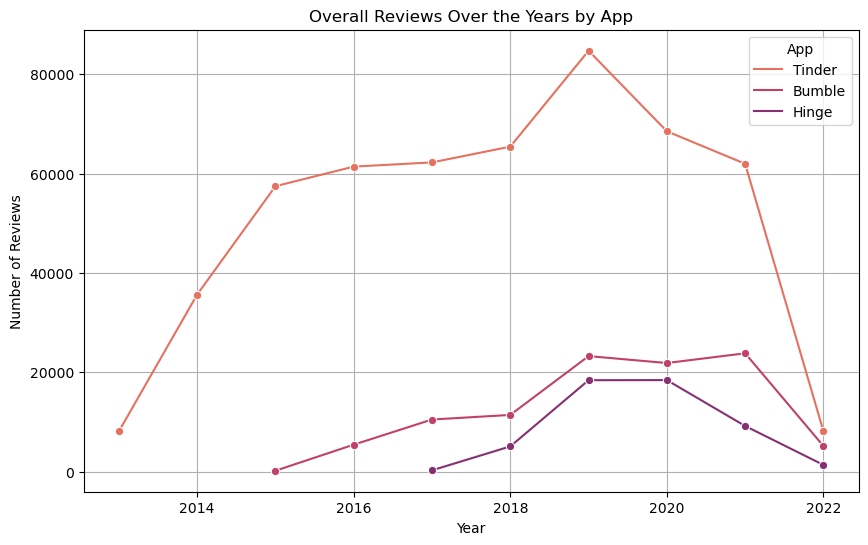

In [81]:
reviews_per_year = datingApp.groupby(['Year', 'App']).size().reset_index(name='Review_Count')

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=reviews_per_year, x='Year', y='Review_Count', hue='App', marker='o', palette='flare')
plt.title('Overall Reviews Over the Years by App')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='App')
plt.grid(True)
plt.show()

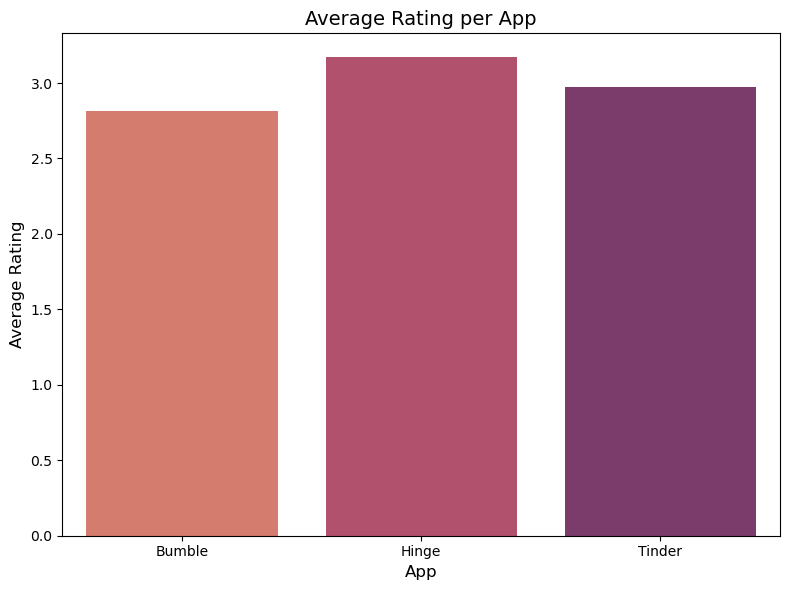

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average rating for each app
avg_rating = datingApp.groupby('App')['Rating'].mean().reset_index()

# Create a bar plot with a specific color scheme
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(data=avg_rating, x='App', y='Rating', palette='flare')  # Use 'coolwarm' palette

# Add titles and labels
plt.title('Average Rating per App', fontsize=14)
plt.xlabel('App', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
positive_reviews = datingApp[datingApp['Rating'] >= 4].groupby('App').size() / datingApp.groupby('App').size()
print(positive_reviews)

App
Bumble    0.420310
Hinge     0.511913
Tinder    0.464399
dtype: float64


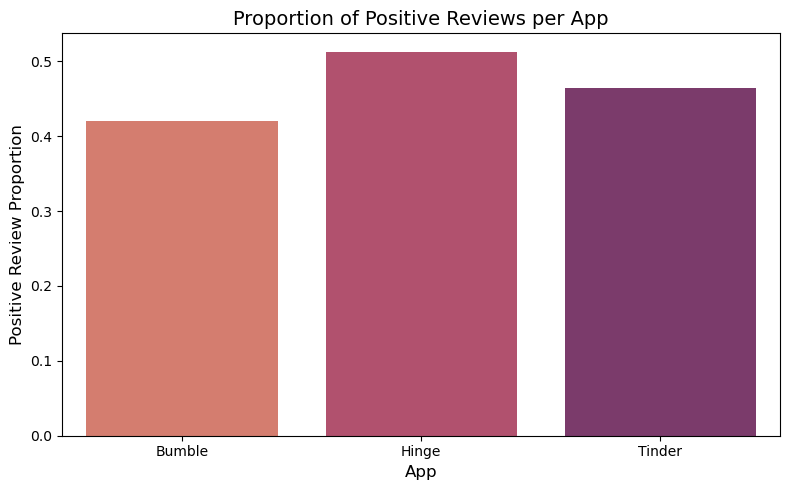

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the proportion of positive reviews per app
positive_reviews = (
    datingApp[datingApp['Rating'] >= 4].groupby('App').size() / datingApp.groupby('App').size()
).reset_index(name='Positive Review Proportion')

# Plot the bar chart using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=positive_reviews, x='App', y='Positive Review Proportion', palette='flare')

# Add titles and labels
plt.title("Proportion of Positive Reviews per App", fontsize=14)
plt.xlabel("App", fontsize=12)
plt.ylabel("Positive Review Proportion", fontsize=12)
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

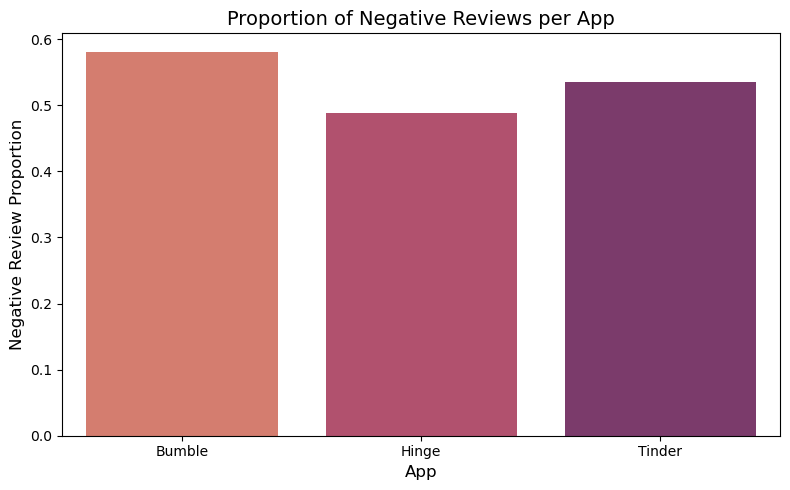

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the proportion of positive reviews per app
negative_reviews = (
    datingApp[datingApp['Rating'] <= 3].groupby('App').size() / datingApp.groupby('App').size()
).reset_index(name='Negative Review Proportion')

# Plot the bar chart using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=negative_reviews, x='App', y='Negative Review Proportion', palette='flare')

# Add titles and labels
plt.title("Proportion of Negative Reviews per App", fontsize=14)
plt.xlabel("App", fontsize=12)
plt.ylabel("Negative Review Proportion", fontsize=12)
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

In [86]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(
    datingApp[datingApp['App'] == 'Tinder']['Rating'],
    datingApp[datingApp['App'] == 'Bumble']['Rating'],
    datingApp[datingApp['App'] == 'Hinge']['Rating']
)
print(f"ANOVA F-Statistic: {f_stat}, P-Value: {p_val}")

ANOVA F-Statistic: 736.3993931749322, P-Value: 3.4515e-320
